<a href="https://colab.research.google.com/github/achraf-halla/ADME/blob/Solubility-Property/Multi_Absorption_regression_dc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
pip install PyTDC

In [36]:
from tdc.single_pred import ADME
dataset_names = ['Solubility_AqSolDB', 'Caco2_Wang', 'Lipophilicity_AstraZeneca']

datasets = {}
for name in dataset_names:
    data = ADME(name=name).get_data()
    datasets[name] = data

Found local copy...
Loading...
Done!
Found local copy...
Loading...
Done!
Downloading...
100%|██████████| 298k/298k [00:00<00:00, 2.72MiB/s]
Loading...
Done!


In [33]:
pip install seaborn

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Solubility_AqSolDB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9982 entries, 0 to 9981
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Drug_ID  9982 non-null   object 
 1   Drug     9982 non-null   object 
 2   Y        9982 non-null   float64
dtypes: float64(1), object(2)
memory usage: 234.1+ KB
None
                 Y
count  9982.000000
mean     -2.889909
std       2.368154
min     -13.171900
25%      -4.326325
50%      -2.618173
75%      -1.209735
max       2.137682
Axes(0.125,0.11;0.775x0.77)

Caco2_Wang
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910 entries, 0 to 909
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Drug_ID  910 non-null    object 
 1   Drug     910 non-null    object 
 2   Y        910 non-null    float64
dtypes: float64(1), object(2)
memory usage: 21.5+ KB
None
                Y
count  910.000000
mean    -5.239498
std     

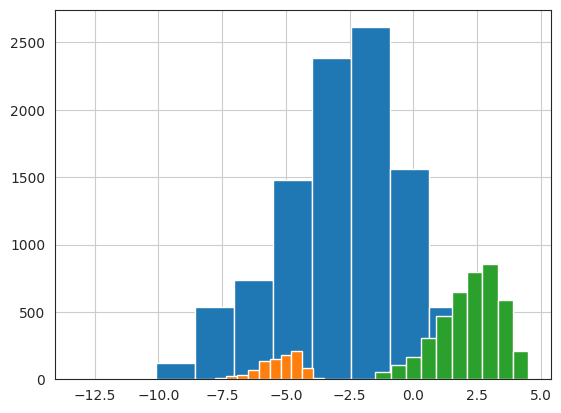

In [37]:
for name, df in datasets.items():
    print(f"\n{name}")
    print(df.info())
    print(df.describe())
    print(df['Y'].value_counts() if df['Y'].nunique() < 10 else df['Y'].hist())

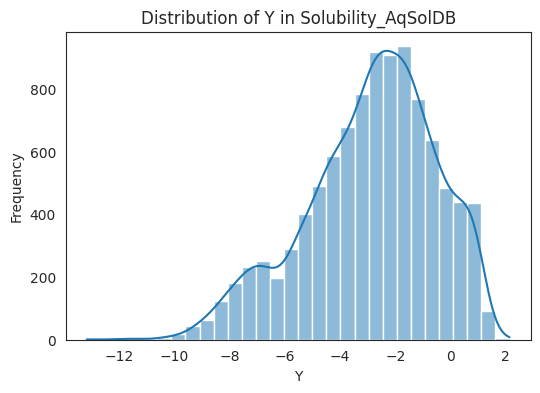

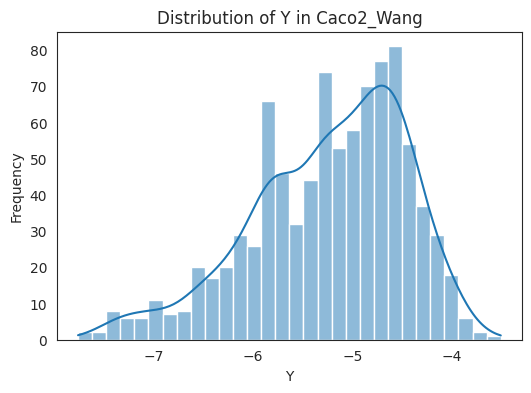

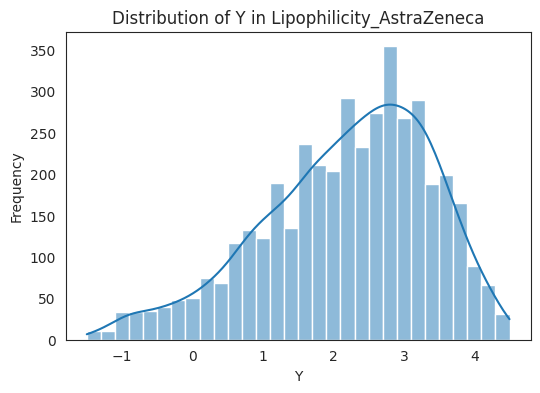

In [38]:
for name, df in datasets.items():
    plt.figure(figsize=(6, 4))
    sns.histplot(df['Y'], bins=30, kde=True)
    plt.title(f'Distribution of Y in {name}')
    plt.xlabel('Y')
    plt.ylabel('Frequency')
    plt.show()


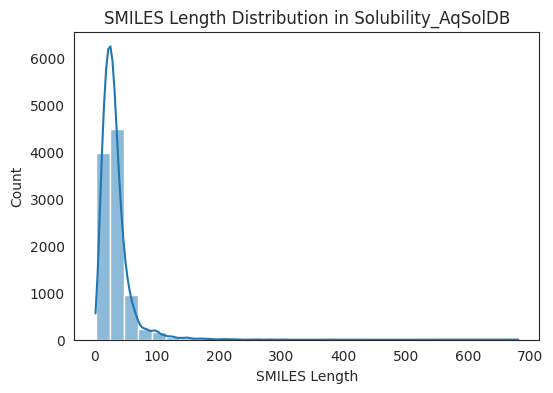

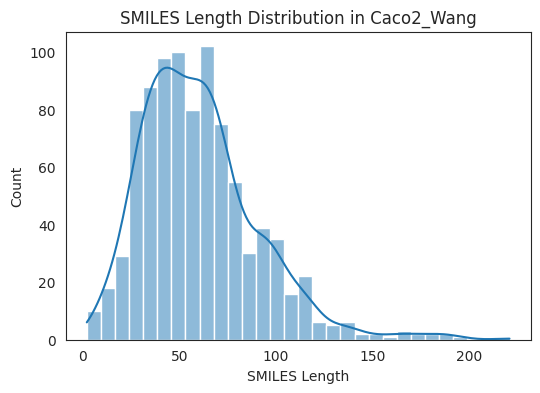

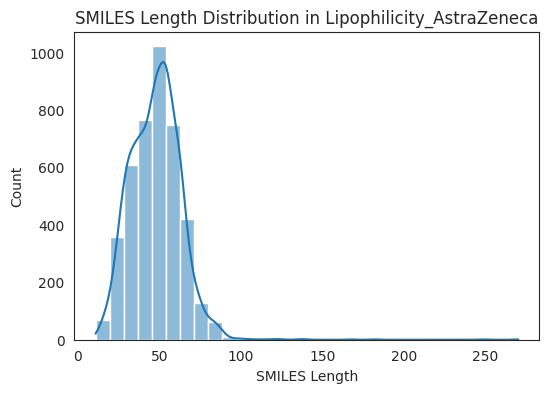

In [39]:
for name, df in datasets.items():
    df['SMILES_length'] = df['Drug'].apply(len)
    plt.figure(figsize=(6, 4))
    sns.histplot(df['SMILES_length'], bins=30, kde=True)
    plt.title(f'SMILES Length Distribution in {name}')
    plt.xlabel('SMILES Length')
    plt.ylabel('Count')
    plt.show()

In [41]:
pip install deepchem

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 11.2 MB/s eta 0:00:00


In [49]:
import deepchem as dc
merged_df = datasets['Solubility_AqSolDB'][['Drug', 'Y']].rename(columns={'Y': 'Solubility'})
merged_df = pd.merge(merged_df, datasets['Caco2_Wang'][['Drug', 'Y']].rename(columns={'Y': 'Caco2'}), on='Drug', how='outer')
merged_df = pd.merge(merged_df, datasets['Lipophilicity_AstraZeneca'][['Drug', 'Y']].rename(columns={'Y': 'Lipophilicity'}), on='Drug', how='outer')


In [50]:
merged_df.head()

,Drug,Solubility,Caco2,Lipophilicity
0,B#N,-6.394784,NaN,NaN
1,B12B3B4B1C234,-4.742403,NaN,NaN
2,Br/C=C/Br,-1.741500,NaN,NaN
3,Br/C=C\Br,-1.319500,NaN,NaN
4,BrC(Br)(Br)Br,-3.140400,NaN,NaN


In [52]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14750 entries, 0 to 14749
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Drug           14750 non-null  object 
 1   Solubility     9983 non-null   float64
 2   Caco2          910 non-null    float64
 3   Lipophilicity  4200 non-null   float64
dtypes: float64(3), object(1)
memory usage: 461.1+ KB


In [53]:
merged_df.describe()

,Solubility,Caco2,Lipophilicity
count,9983.000000,910.000000,4200.000000
mean,-2.890075,-5.239498,2.186336
std,2.368094,0.777236,1.203004
min,-13.171900,-7.760000,-1.500000
25%,-4.327650,-5.777444,1.410000
50%,-2.618300,-5.131224,2.360000
75%,-1.209823,-4.641339,3.100000
max,2.137682,-3.510000,4.500000


In [74]:
featurizer = dc.feat.CircularFingerprint()
tasks = ['Solubility', 'Caco2', 'Lipophilicity']

In [75]:
with dc.utils.UniversalNamedTemporaryFile(mode='w') as tmpfile:
    merged_df.to_csv(tmpfile.name, index=False)
    loader = dc.data.CSVLoader(tasks=tasks, feature_field="Drug", featurizer=featurizer)
    dataset = loader.create_dataset(tmpfile.name)

[17:40:27] WARNING: not removing hydrogen atom without neighbors
[17:40:27] WARNING: not removing hydrogen atom without neighbors
[17:40:28] WARNING: not removing hydrogen atom without neighbors
[17:40:28] WARNING: not removing hydrogen atom without neighbors
[17:40:29] WARNING: not removing hydrogen atom without neighbors
[17:40:30] WARNING: not removing hydrogen atom without neighbors
[17:40:32] WARNING: not removing hydrogen atom without neighbors
[17:40:32] WARNING: not removing hydrogen atom without neighbors
[17:40:33] WARNING: not removing hydrogen atom without neighbors
[17:40:34] WARNING: not removing hydrogen atom without neighbors
[17:40:35] WARNING: not removing hydrogen atom without neighbors
[17:40:35] WARNING: not removing hydrogen atom without neighbors
[17:40:35] WARNING: not removing hydrogen atom without neighbors
[17:40:35] WARNING: not removing hydrogen atom without neighbors
[17:40:36] WARNING: not removing hydrogen atom without neighbors
[17:40:36] WARNING: not r

In [76]:
from deepchem.splits import RandomStratifiedSplitter
splitter = RandomStratifiedSplitter()
train, valid, test = splitter.train_valid_test_split(dataset)

In [77]:
train

<DiskDataset X.shape: (11800, 2048), y.shape: (11800, 3), w.shape: (11800, 3), task_names: ['Solubility' 'Caco2' 'Lipophilicity']>

In [78]:
from deepchem.models import MultitaskFitTransformRegressor

model = MultitaskFitTransformRegressor(n_tasks=len(tasks), n_features=dataset.X.shape[1],layer_sizes=[1000],
                                      dropouts=0.2,
                                      learning_rate=0.0001)
model.fit(train)

0.6239452362060547

In [79]:
X, y = train.X, train.y
print("Feature NaNs:", np.isnan(X).sum())
print("Label NaNs:", np.isnan(y).sum())


Feature NaNs: 0
Label NaNs: 0


In [80]:
from deepchem.metrics import Metric, mae_score
model.evaluate(test, [Metric(metric = mae_score, mode = "regression", n_tasks= 3) ], per_task_metrics= True)

({'mae_score': 2.5826806140196727},
 {'mae_score': [1.79179546595307, 4.614938002603199, 1.3413083735027502]})